In [2]:
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np

faces = fetch_olivetti_faces()
print(faces.data.shape)
faces_data = faces.data
faces_target = faces.target

faces_data

(400, 4096)


array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [3]:
## viewing number of images in each category
np.unique(faces_target, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10], dtype=int64))

In [4]:
splitter = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)

train_x = []
test_x = []
train_y = []
test_y = []

for train_index, test_index in splitter.split(faces_data, faces_target):
    train_x = faces_data[train_index]
    test_x = faces_data[test_index]
    train_y = faces_target[train_index]
    test_y = faces_target[test_index]

print(np.unique(train_y, return_counts=True))
print(np.unique(test_y, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64))


In [5]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
x_train_pca = pca.fit_transform(train_x)
x_test_pca = pca.transform(test_x)

pca.n_components_

220

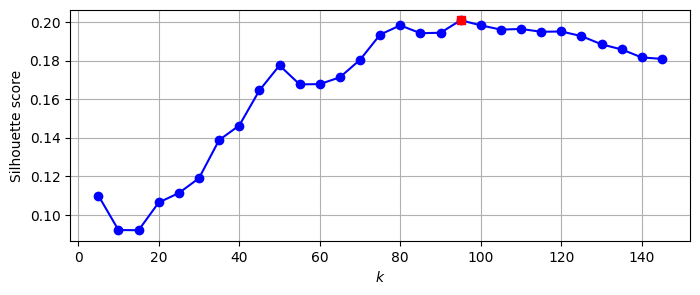

best_k 95


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_range = range(5, 150, 5)
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(x_train_pca) for k in k_range]
silhouette_scores = [silhouette_score(x_train_pca, model.labels_) for model in kmeans_per_k]

best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(range(5, 150, 5), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

print('best_k', best_k)

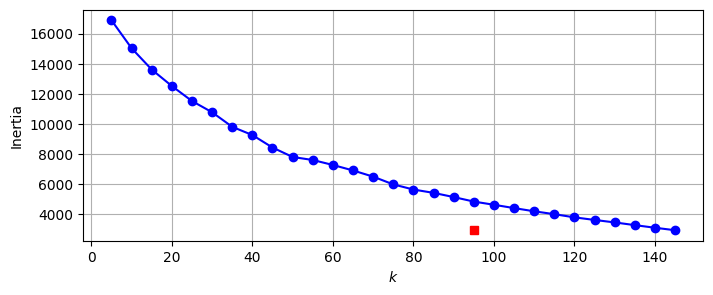

In [7]:
kmeans_per_k_2 = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(x_train_pca) for k in k_range]
inertias = [model.inertia_ for model in kmeans_per_k_2]

best_index_2 = np.argmin(inertias)
best_k_2 = k_range[best_index]
best_score_2 = inertias[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k_2, inertias[best_index_2], "rs")
plt.grid()
plt.show()

# with this method we can't find the best k, because the inertia is not decreasing monotonically

In [8]:
best_model = kmeans_per_k[best_index]

Cluster 0


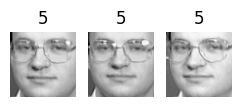

In [9]:
index = 0

for label in np.unique(sorted(best_model.labels_)):
    in_cluster = best_model.labels_ == label

    faces = train_x[in_cluster]
    labels = train_y[in_cluster]

    faces = faces.reshape(-1, 64, 64)

    n_cols = 20

    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))

    print("Cluster", label)

    for index, (face, label) in enumerate(zip(faces, labels)):
        index += 1

        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

    if index == 3:
        break

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train_pca, train_y)

print('score', sgd_clf.score(x_test_pca, test_y))

score 0.9


In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(x_train_pca, train_y)

print('score', clf.score(x_test_pca, test_y))

score 0.875


In [12]:
X_train_reduced = best_model.transform(x_train_pca)
X_valid_reduced = best_model.transform(x_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, train_y)

# we can see that is not good at all, event reducing the dimensionality
clf.score(X_valid_reduced, test_y)

0.8

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kmeans__n_clusters': range(5, 150, 5),
}

pipeline = Pipeline([
    ('kmeans', KMeans(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=150, random_state=42))
])

grid_clf = GridSearchCV(pipeline, param_grid, cv=2, n_jobs=-1, verbose=1)
grid_clf.fit(x_train_pca, train_y)

grid_clf.score(x_test_pca, test_y)

Fitting 2 folds for each of 29 candidates, totalling 58 fits


C:\Users\rbblazquez\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.825

Exercise: What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?



In [29]:
x_train_extended = np.c_[x_train_pca, X_train_reduced]
x_valid_extended = np.c_[x_test_pca, X_valid_reduced]

array([[-2.3363235 ,  1.4765745 ,  1.1815201 , ..., 11.780424  ,
        16.703438  , 10.262982  ],
       [ 0.91730803, -4.7115364 , -3.9060302 , ..., 10.092998  ,
        14.9066925 , 10.612658  ],
       [ 0.51892483,  0.4241676 ,  1.8351116 , ..., 13.056562  ,
        15.816956  ,  9.924336  ],
       ...,
       [-3.0251713 ,  0.37623098,  5.3201113 , ..., 12.708371  ,
        18.89444   , 12.05765   ],
       [-3.286416  ,  6.7319674 ,  0.13773759, ..., 15.973697  ,
        18.832556  , 13.818401  ],
       [ 9.66657   ,  1.295328  , -0.62029004, ..., 16.000544  ,
         9.904247  ,  9.784355  ]], dtype=float32)

In [30]:
new_clf = RandomForestClassifier(n_estimators=150, random_state=42)
new_clf.fit(x_train_extended, train_y)

new_clf.score(x_valid_extended, test_y)

0.8375

We can see its a little bit better, but not much


#### Now we are going to try to use Gaussian Mixtures

In [38]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, n_init=10, random_state=42)
gm.fit(x_train_pca)

1164324.3957347479

In [143]:
n_gen_faces = 30
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
print(gen_faces_reduced.shape)
gen_faces = pca.inverse_transform(gen_faces_reduced)

gen_faces

(30, 220)


array([[0.40767439, 0.38581323, 0.2768766 , ..., 0.40220598, 0.47581895,
        0.48058154],
       [0.22184678, 0.15226219, 0.19699098, ..., 0.49151799, 0.42655708,
        0.41492495],
       [0.39086946, 0.28517033, 0.15127574, ..., 0.41155905, 0.38102279,
        0.3433853 ],
       ...,
       [0.22589184, 0.32614915, 0.32722618, ..., 0.6053592 , 0.64486157,
        0.43581326],
       [0.45199046, 0.48065517, 0.50624132, ..., 0.45385834, 0.34907785,
        0.27877289],
       [0.31925731, 0.43655355, 0.51560765, ..., 0.16485107, 0.2143347 ,
        0.25881345]])

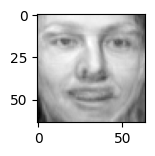

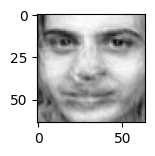

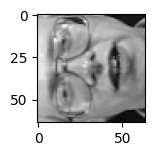

(12, 4096)

In [170]:
import cv2
from scipy import ndimage

gen_faces = gen_faces.reshape(-1, 64, 64)

gen_faces_brightness = gen_faces[0:4] + 50
gen_faces_brightness = gen_faces_brightness.reshape(-1, 64*64)
y_brightness = y_gen_faces[0:4]

rotated = np.transpose(train_x[5:9].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_gen_faces[5:9]

gen_faces_flip = cv2.flip(gen_faces[10:14], 0)
gen_faces_flip = gen_faces_flip.reshape(-1, 64*64)
y_flip = y_gen_faces[10:14]

plt.subplot(1, 4, 1)
plt.imshow(gen_faces_flip[0].reshape(64, 64, 1), cmap='gray')
plt.show()

plt.subplot(1, 4, 2)
plt.imshow(gen_faces_brightness[0].reshape(64, 64, 1), cmap='gray')
plt.show()

plt.subplot(1, 4, 3)
plt.imshow(rotated[0].reshape(64, 64, 1), cmap='gray')
plt.show()

bad_gen_faces = np.concatenate([gen_faces_flip, gen_faces_brightness, rotated])
y_bad_gen_faces = np.concatenate([y_flip, y_brightness, y_rotated])
bad_gen_faces.shape

In [171]:
x_bad_faces_pca = pca.transform(bad_gen_faces)
x_bad_faces_pca.shape

(12, 220)

In [172]:
gm.score_samples(x_bad_faces_pca) # as we can see, the score is very low, so we can say that the faces are not good

array([ 1.13755871e+03,  1.08896481e+03,  1.09439180e+03,  1.08044539e+03,
       -2.46195517e+12, -2.45908972e+12, -2.46381974e+12, -2.44726011e+12,
       -3.65828627e+07, -3.35416269e+07, -4.00621893e+07, -2.54559365e+07])

In [173]:
gm.score_samples(x_train_pca) # as we can see, the score is high for the train set, so we can say that the faces are good

array([1236.34743616, 1258.21350258, 1280.24563094, 1258.73090418,
       1258.21350164, 1258.21350132, 1267.4011749 , 1258.73090466,
       1259.18696336, 1258.73090408, 1259.9443692 , 1229.37222832,
       1184.35817103, 1259.71500638, 1236.34974565, 1258.56342808,
       1231.23639767, 1184.35816478, 1264.11215885, 1280.74363609,
       1186.31361888, 1287.46831167, 1235.75219544, 1281.4068765 ,
       1259.71500618, 1288.41193529, 1290.30807399, 1281.40687717,
       1259.94436999, 1264.91521216, 1287.4683117 , 1280.74363682,
       1186.31362453, 1259.71500647, 1295.87342218, 1267.40117279,
       1236.34743632, 1231.23638746, 1236.34974557, 1296.12184307,
       1303.98681868, 1264.11215961, 1251.96658275, 1267.40117599,
       1236.34974636, 1237.46524773, 1186.3136321 , 1259.94437151,
       1280.17710015, 1259.58774938, 1237.46524897, 1243.6653227 ,
       1273.21664454, 1275.64915636, 1237.46525067, 1186.31362884,
       1280.24563099, 1258.47057002, 1273.21664619, 1259.58774

In [174]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)

    return mse

reconstruction_errors(pca, train_x).mean()

0.00019258422

In [175]:
reconstruction_errors(pca, bad_gen_faces).mean()

4.181998044295735

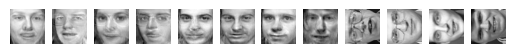

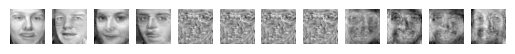

In [181]:
X_bad_faces_reconstructed = pca.inverse_transform(x_bad_faces_pca)

X_bad_faces_reconstructed = X_bad_faces_reconstructed.reshape(-1, 64, 64)
bad_gen_faces_reshape = bad_gen_faces.reshape(-1, 64, 64)

for i in range(12):
    plt.subplot(1, 12, i+1)
    plt.imshow(bad_gen_faces_reshape[i], cmap="gray")
    plt.axis('off')
plt.show()

for i in range(12):
    plt.subplot(1, 12, i+1)
    plt.imshow(X_bad_faces_reconstructed[i], cmap="gray")
    plt.axis('off')
plt.show()